### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("./../../Section 3/S_3_L_11/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

C:\Users\Cesar\AppData\Local\Temp\ipykernel_24904\3874627497.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')




### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = wn

C:\Users\Cesar\AppData\Local\Temp\ipykernel_24904\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.434211
std,292.559287,292.844666
min,438.920000,51.468377
25%,914.620000,890.475771
50%,1144.650000,1094.699703
75%,1316.280729,1284.520569
max,1570.252238,2130.268131


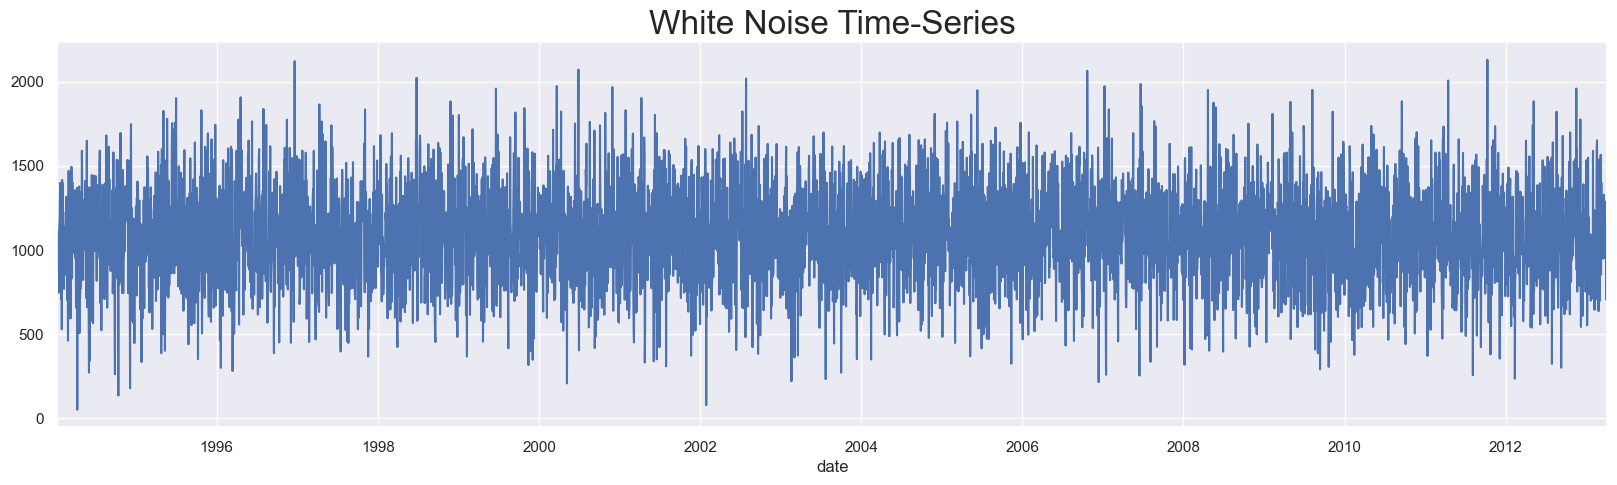

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

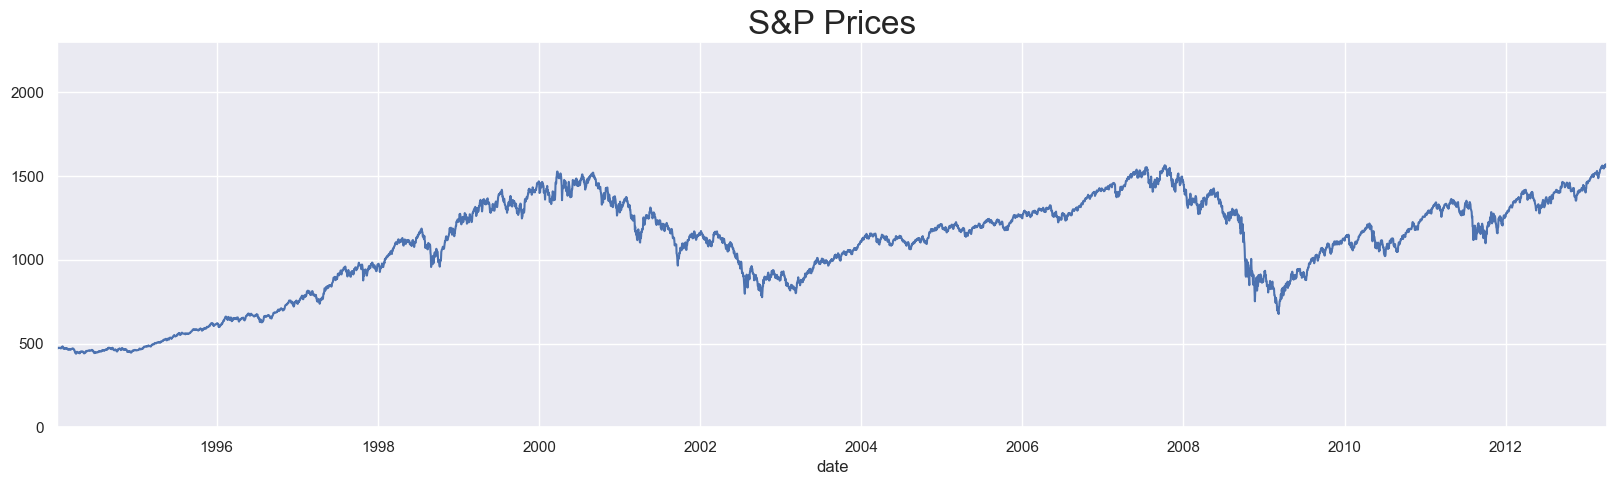

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [10]:
rw = pd.read_csv("./../S_5_L_22/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [11]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [12]:
df['rw'] = rw.price

C:\Users\Cesar\AppData\Local\Temp\ipykernel_24904\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [13]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,880.958410,1122.139662
1994-01-10,475.27,1115.149033,1080.347860
1994-01-11,474.13,1082.611363,1082.095245
1994-01-12,474.17,1101.110293,1083.639265
1994-01-13,472.47,1058.612565,1067.146255


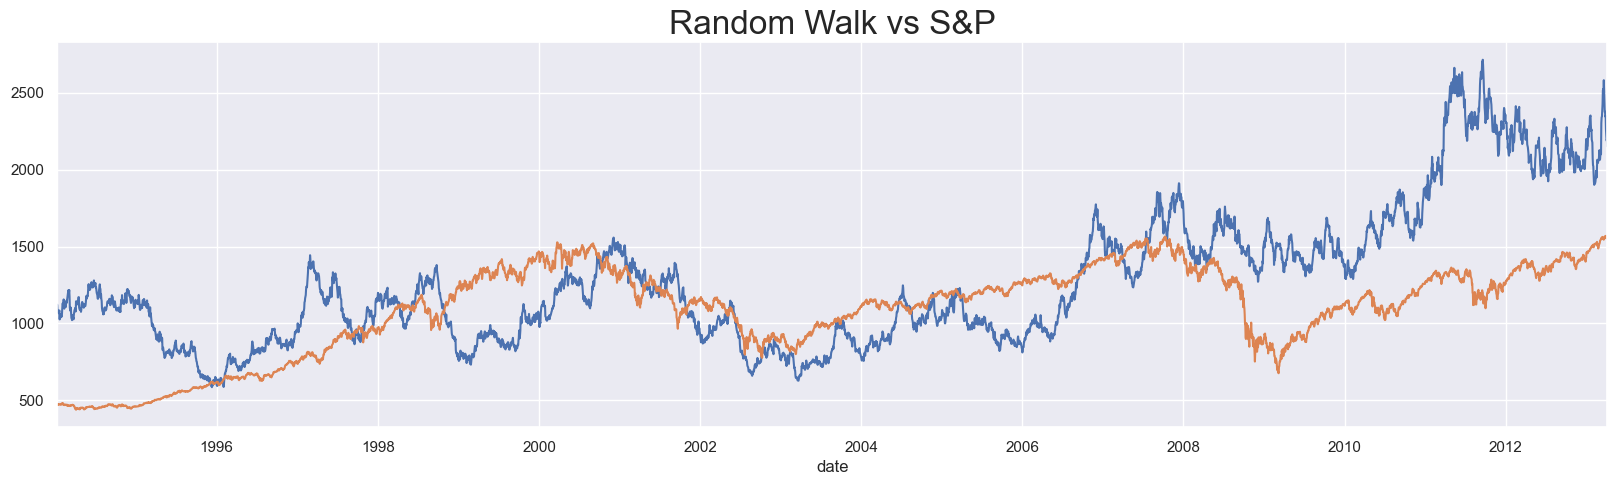

In [14]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [15]:
sts.adfuller(df.market_value)

(np.float64(-1.7369847452352465),
 np.float64(0.4121645696770607),
 18,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(39904.880607487445))

On the first line we see the T statistic (-1.7369...) which is greater than each of the critical values (1%, 5% and 10%).   
Thus, for all these levels of significance, we don't find sufficient evidence of stationarity in the data set.  
The second line of the results expresses the p value associated with the T statistic, p_value = 0.4121  
This suggests there is roughly a 40% chance of not rejecting the null hipotesis so we can't confirm the data as stationary.
the p_value should be smaller than 0.05 or 0.01 to assume that the data is stationary with a 5% or 1% of significance respectively  
The third line represents the number of lags, in this case we have 18, So there is some autocorrelation going back 18 periods.  
Of course, we'll take this into account when picking the appropriate model
The fourth line, it expresses the number of observations used in the analysis.  
The last line of the code estimates the maximized infomration criteria provided there is some apparent autocorrelation. the lower the values, the easier it is to make predictions for the future.

[statsmodels.tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [16]:
sts.adfuller(df.wn)

(np.float64(-51.61665054156322),
 0.0,
 1,
 5019,
 {'1%': np.float64(-3.4316535759402753),
  '5%': np.float64(-2.8621160400844468),
  '10%': np.float64(-2.567076626752987)},
 np.float64(70831.6140194081))

In [17]:
sts.adfuller(df.rw)

(np.float64(-1.3286073927689734),
 np.float64(0.6159849181617376),
 24,
 4996,
 {'1%': np.float64(-3.4316595802782865),
  '5%': np.float64(-2.8621186927706463),
  '10%': np.float64(-2.567078038881065)},
 np.float64(46299.333497595144))

### Seasonality

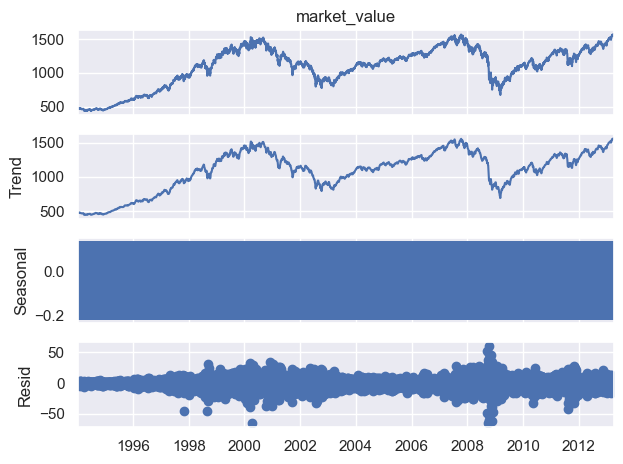

In [18]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

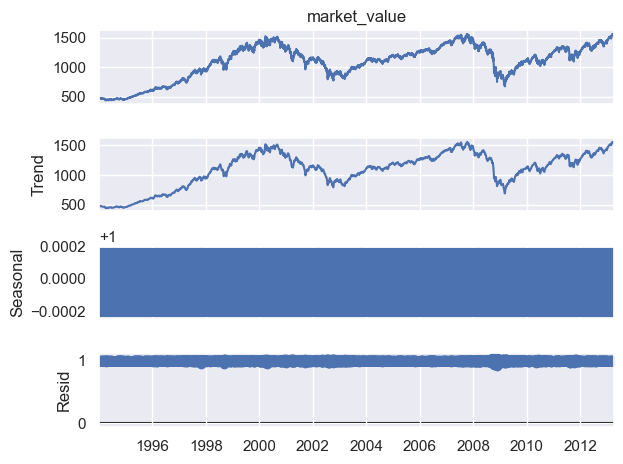

In [19]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

The seasonal plot looks like a rectangle, this happend when the values are constantly ocillating back and forth and the figure is too small. In our case, the linear change results from constantly switching up and down between -0.2 and positive 0.1 for every period. Therefore, there is no concrete cyclical pattern determined by using naive decomposition.

### ACF

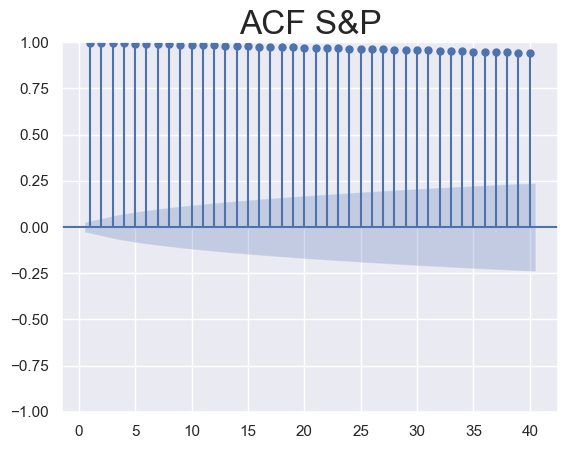

In [20]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

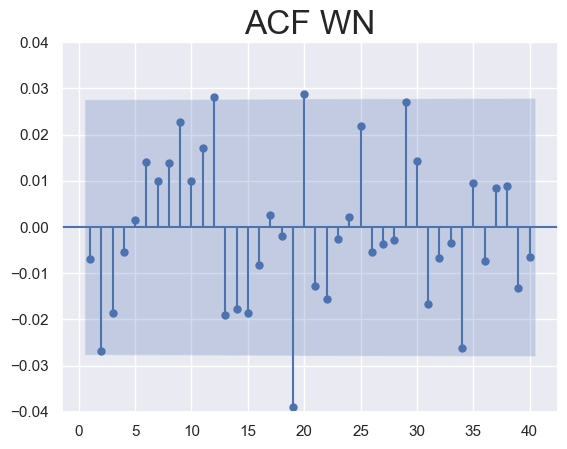

In [23]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.ylim(-0.04,0.04)
plt.show()

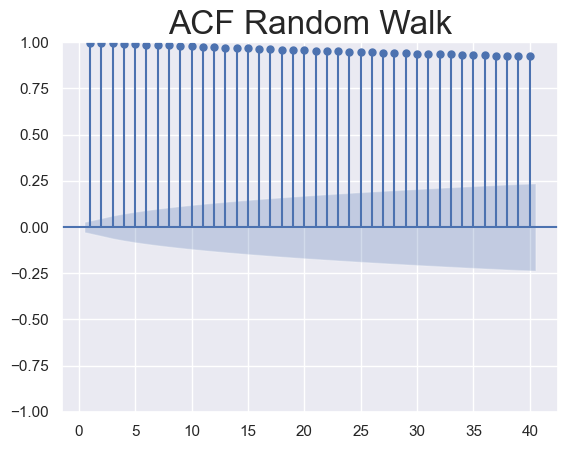

In [24]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF Random Walk", size = 24)
plt.show()

The Autocorrelation Function (ACF) measures the correlation of a signal with a lagged version of itself over varying time intervals or lags. It is commonly used in time series analysis to identify patterns such as seasonality or trend, and to determine if a given time series is stationary.

Key Concepts:
1. Autocorrelation: It quantifies how the values of a time series at one time point are related to the values at another time point. ACF values range from -1 to 1:

1 indicates perfect positive correlation.
-1 indicates perfect negative correlation.
0 indicates no correlation.
2. Lag: The time difference between the observations being compared. The ACF is computed at various lags (0, 1, 2,...n).

3. Stationarity: A stationary series has constant mean and variance over time, and it’s often a requirement for many statistical methods.

Interpretation:
1. ACF Plot: A graph of ACF values versus lag. It helps visualize the degree of correlation at each lag.

Significant Peaks: Peaks above a certain threshold indicate persistence in the data, suggesting seasonality or cyclic behavior.
Decay Pattern: A gradual decay towards zero suggests a non-stationary process (e.g., trend), while a quick drop to zero indicates stationarity.
2. Use in Modeling: ACF can help identify appropriate models for time series forecasting, such as ARIMA:

AR (AutoRegressive): If ACF shows exponential decay, it might suggest an AR model.
MA (Moving Average): If the ACF cuts off abruptly, it may suggest an MA model.
Steps to Use ACF:
Plot the ACF.
Look for significant correlations.
Determine the nature of the time series (stationary or non-stationary).
Select a suitable model based on the patterns observed.
Overall, the ACF function is a vital tool in understanding the relationships within time series data, guiding effective modeling and forecasting efforts.

### PACF

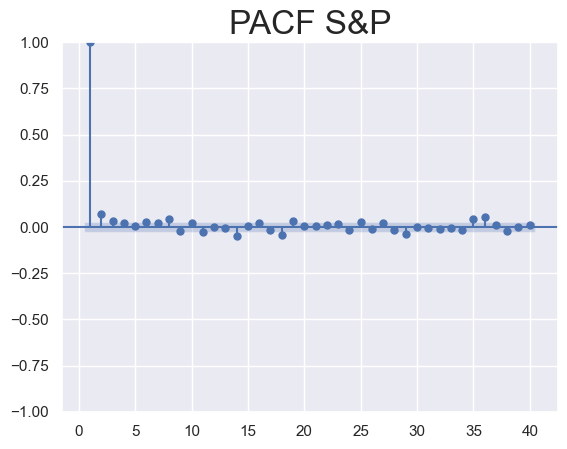

In [25]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

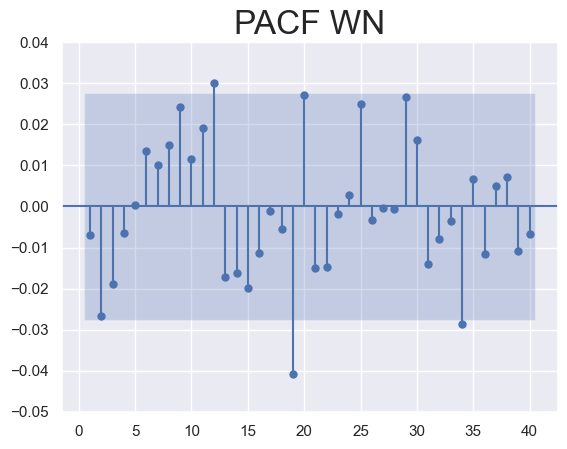

In [28]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.ylim(-0.05,0.04)
plt.show()

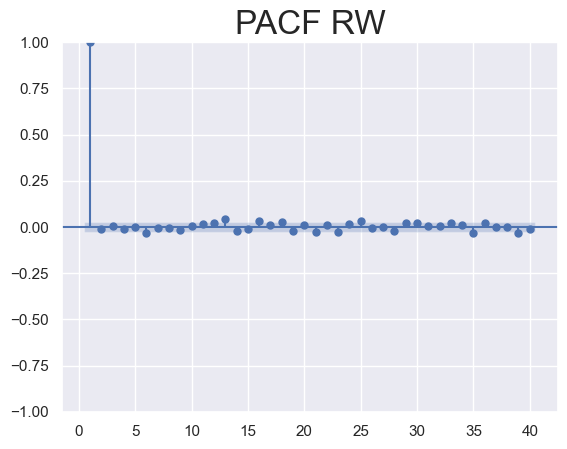

In [29]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()

The Partial Autocorrelation Function (PACF) measures the correlation between observations of a time series separated by k lags, after accounting for the correlations at shorter lags. It helps to isolate the direct effect of one observation on another at a specific lag, avoiding the influence of intermediate lags.

Key Concepts:
1. Partial Autocorrelation: Unlike the ACF, which includes all correlations up to a certain lag, the PACF accounts only for the direct relationship between the series at the specified lag. It is calculated for each lag separately, removing the effects of shorter lags.

2. Lag: Similar to ACF, the lag refers to the time intervals between observations.

Interpretation:
1. PACF Plot: A graph that displays PACF values against the lag number, helping to visualize how the correlation behaves at different lags:

Significant Values: Peaks in the PACF plot help identify the number of autoregressive (AR) terms to include in a model.
Cutoff Pattern: If the PACF values drop to zero after a certain lag, it suggests a potential AR model structure.
2. Use in Modeling: PACF is particularly useful in determining the order of AR components in ARIMA models:

If the PACF shows significant values up to lag p and then cuts off, it indicates that an AR(p) model may be appropriate.
Conversely, if the PACF tails off, it may suggest a more complex AR structure.
Steps to Use PACF:
Plot the PACF.
Identify significant correlations at various lags.
Assess the cutoff point to determine the order of the autoregressive part of the model.
Summary:
The PACF assists in understanding the direct dependencies within a time series and is essential for model selection, especially in ARIMA modeling frameworks. By examining how the partial autocorrelations behave, analysts can effectively determine how many lags are relevant in capturing the underlying structure of the time series being evaluated.